In [1]:
from scipy.integrate import odeint
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def plasma_membrane(initial_val, t, y, k, S_e, W, j, a, z, v_max, V, K_m):
    P, P_b, P_u, S = initial_val

    dP_dt = y - k * S_e * P - (k / W) * S * P + j * P_b
    dPb_dt = k * S_e * P + (k / W) * S * P - j * P_b - a * P_b
    dPu_dt = a * P_b - z * P_u
    dS_dt = -1 * (k / W) * S * P + (j + a) * P_b - v_max * S / (V * (K_m + S))

    return [dP_dt, dPb_dt, dPu_dt, dS_dt]

In [116]:
# params
a = 1
b = 1
f = 0.1
g = 0.1
j = 100
K_d = .74
k = j / K_d
y = 0.000083
z = 0.002
A_e = 47
A_p = 314
W = 32
v_max = 8.8 * 10 ** 3
K_m = 2.5
V = 523
t_range = np.linspace(0, 3000, 10000)
Se_vals = [0.01, 0.1, 0.15, 0.35, 0.7, 0.9]

/Users/mwshumway/miniconda3/envs/acme3-10/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


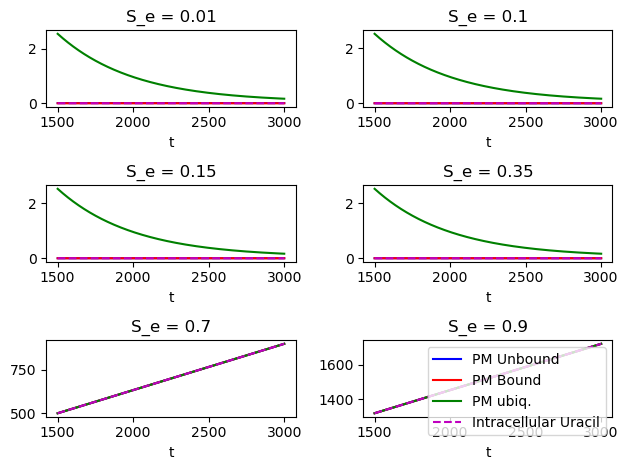

In [117]:
def plot_PM():
    # Plasma Membrane Only
    for i, S_e in enumerate(Se_vals):
        plt.subplot(3, 2, i + 1)
        PM_sol = odeint(plasma_membrane, y0=[50, 0, 0, 0], t=t_range, args=(y, k, S_e, W, j, a, z, v_max, V, K_m))

        plt.plot(t_range[5000:], PM_sol[5000:, 0], 'b-')
        plt.plot(t_range[5000:], PM_sol[5000:, 1], 'r')
        plt.plot(t_range[5000:], PM_sol[5000:, 2], 'g')
        plt.plot(t_range[5000:], PM_sol[5000:, 3], 'm--')
        plt.title(f"S_e = {S_e}")
        plt.xlabel("t")

    plt.legend(["PM Unbound", "PM Bound", "PM ubiq.", "Intracellular Uracil"])
    plt.tight_layout()
    plt.show()

plot_PM()

Run a time course for steady state at Se = k, then for a new time course experiment, take t0 to be a time at steady state of system 1. For the new time course experiment, run with a Se lower than the initial.

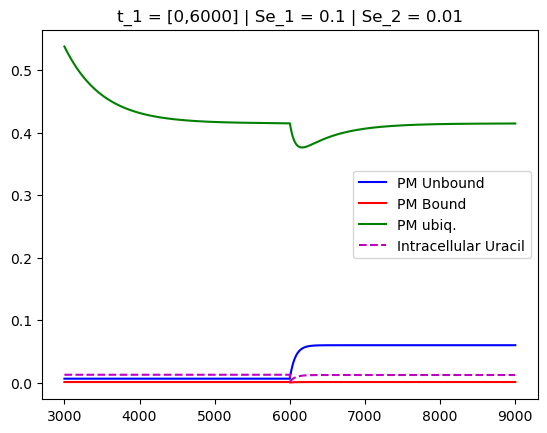

In [134]:
def PM_experiment(Se_1, Se_2, y=0.00083, k=100/0.74, W=32, j=100, a=1, z=0.002, v_max=8.8*10**3, V=523, K_m=2.5):
    t_range1 = np.linspace(0, 6000, 20000)
    t_range2 = np.linspace(6000, 9000, 40000)
    PM_sol1 = odeint(plasma_membrane, y0=[50,0,0,0], t=t_range1, args=(y, k, Se_1, W, j, a, z, v_max, V, K_m))
    PM_sol2 = odeint(plasma_membrane, y0=PM_sol1[-1], t=t_range2, args=(y, k, Se_2, W, j, a, z, v_max, V, K_m))
    # Is this y0 correct? Or should I take a more arbitrary y0 to run the second time course?

    PM_sol = np.vstack((PM_sol1, PM_sol2))
    t_range = np.hstack((t_range1, t_range2))

    plt.plot(t_range[10000:], PM_sol[10000:, 0], 'b-')
    plt.plot(t_range[10000:], PM_sol[10000:, 1], 'r')
    plt.plot(t_range[10000:], PM_sol[10000:, 2], 'g')
    plt.plot(t_range[10000:], PM_sol[10000:, 3], 'm--')

    plt.legend(["PM Unbound", "PM Bound", "PM ubiq.", "Intracellular Uracil"])
    plt.title("t_1 = [0,6000] | Se_1 = 0.1 | Se_2 = 0.01")


# PM_experiment(.1, 0.02)
PM_experiment(0.1, 0.01)